# Linear Regression in one variable

## Problem statement: Suppose we would like to find out what profit(or loss) can be gained from a food truck in a arbitrary city, based on its popluation.

In [137]:
#First we read the dataset into a variable, and print the dataset for our view. X is the population of the city, and y is the
#profit gained from the city. A negative y value is loss.

import numpy as np

file = 'dataset.txt'
data = np.loadtxt(file, delimiter=',', skiprows = 0, dtype = float)
print(data[:5])

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


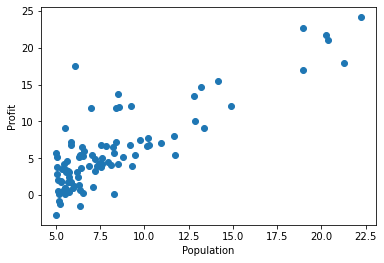

In [138]:
#Let's visualise this data, with x-axis being the population and y-axis being the profit. We need to fit a best-fit line through
#this graph.

import matplotlib.pyplot as plt

X1 = []
y = []
for i in data:
    X1.append(i[0])
    y.append(i[1])

X1 = np.array(X1).reshape(97, 1)
y = np.array(y).reshape(97, 1)
m = len(data) #number of traning examples

plt.xlabel('Population')
plt.ylabel('Profit')
plt.scatter(X1, y)
plt.show()

In [139]:
#We will now write the cost function, and compute the cost on the sample value of theta at zero.

X0 = np.ones(len(X1), dtype = float).reshape(97, 1) #Making the X0 values all ones
X = np.append(X0, X1, axis=1).reshape(97, 2)
theta = np.zeros((2, 1))

#Creating function of cost function
def computeCost(X, y, theta):
    J = (1/(2*m))*(np.sum(np.square((X @ theta) - y)))
    return J;

#Computing the cost on for theta values as zero
J = computeCost(X, y, theta)
print("Cost for theta as zeros is:", J)

Cost for theta as zeros is: 32.072733877455676


In [140]:
#Let's move to gradient descent

alpha = 0.01
iterations = 1500 #we will run our gradient descent these many times

def gradientDescent(X, y, theta, alpha, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta = theta - ((alpha/m)*(X.transpose() @ ((X @ theta)-y)))
        J_history[iter] = computeCost(X, y, theta)
    return [theta, J_history]

returned = gradientDescent(X, y, theta, alpha, iterations, m)
theta = returned[0]
J_history = returned[1]

print("The theta values after computing is:\ntheta0:", theta[0], "theta1:", theta[1])

The theta values after computing is:
theta0: [-3.63029144] theta1: [1.16636235]


In [141]:
#Having computed the minimas, we are now at a position to predict the profit for arbitrary populations.

prediction1 = (np.array([1, 7]).reshape(1, 2)) @ theta #prediction for a population of 70,000
prediction2 = (np.array([1, 3.5]).reshape(1, 2)) @ theta #prediction for a population of 35,000

print("Prediction of profit for a population of 70,000:", prediction1*10000)
print("Prediction of profit for a population of 35,000:", prediction2*10000)

Prediction of profit for a population of 70,000: [[45342.45012945]]
Prediction of profit for a population of 35,000: [[4519.7678677]]


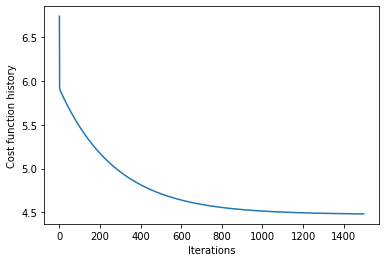

In [144]:
#We will also plot the value of the cost function after each iteration, to see the value reach a minimum and converge to a
#stabalised value
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(1500), J_history)